In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import linprog

In [3]:
N = 50
a = np.linspace(0, 1, N)
b = 4*a - 1
b = b + np.random.randn(N)

b_outliers = b.copy()
for i in range(0, 3):
    j = np.random.randint(0, N)
    b_outliers[j] += np.random.normal(0, 20)

A = np.vstack([a, np.ones(N)]).T

Exercise 1: (Least Squares Fitting)

[ 3.91023046 -0.77440839]


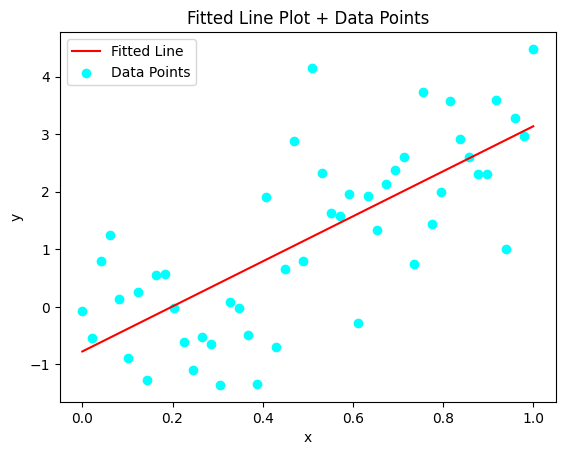

[2.51479884 0.43905721]


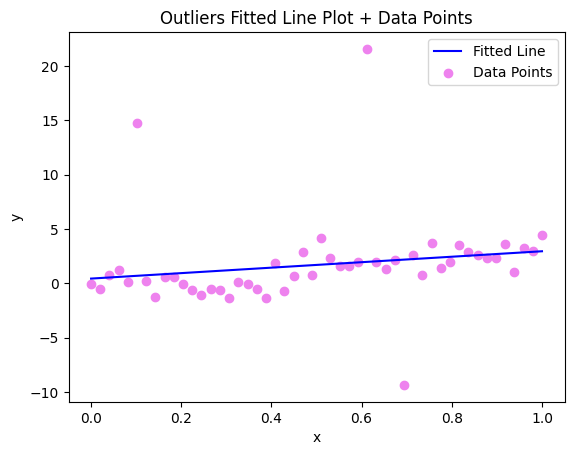

In [4]:
coefficients = np.linalg.pinv(A) @ b
coefficients1 = np.linalg.solve(A.T @ A, A.T @ b)

x_values = np.linspace(0, 1, N)
y_values = coefficients[0] * x_values + coefficients[1]
print(coefficients)

plt.plot(x_values, y_values, label='Fitted Line', color = 'red')
plt.scatter(a, b, label='Data Points', color = 'cyan')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Line Plot + Data Points')

plt.show()


# Outliers
coefficients = np.linalg.pinv(A) @ b_outliers
coefficients1 = np.linalg.solve(A.T @ A, A.T @ b_outliers)

x_values = np.linspace(0, 1, N)
y_values = coefficients[0] * x_values + coefficients[1]
print(coefficients)

plt.plot(x_values, y_values, label='Fitted Line', color = 'blue')
plt.scatter(a, b_outliers, label='Data Points', color = 'violet')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Outliers Fitted Line Plot + Data Points')

plt.show()

Exercise 2: (l_inf Fitting)

Optimal value without outliers:


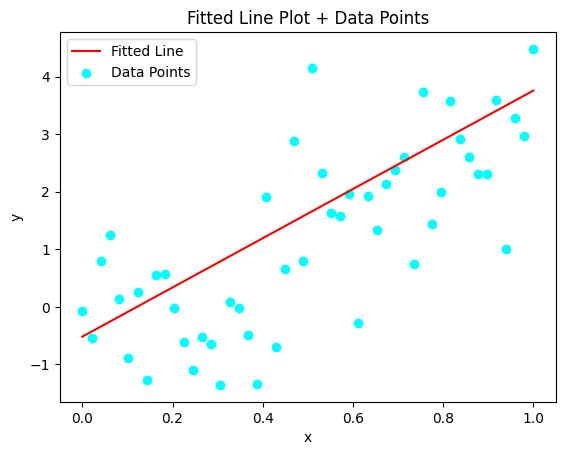

Optimal value: 2.484313628875378
Optimal solution: [ 4.27221044 -0.51752327  2.48431363]
-------------------------------------- 

Optimal value with outliers:


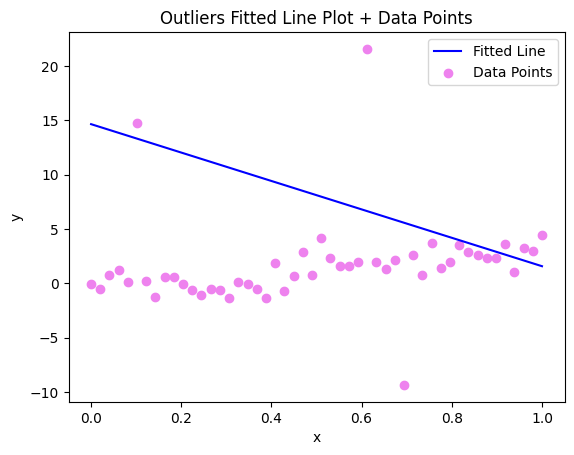

Optimal value: 14.927069252786342
Optimal solution: [-13.07239311  14.65091601  14.92706925]
-------------------------------------- 



In [49]:
b1 = b

for i in range(0, 2):
    if i == 0:
        b1 = b1
    else:
        b1 = b_outliers
    c = [0, 0, 1]

    # Define the inequality constraints matrix
    C = np.vstack([A, -A]).T
    C = np.vstack([C, -np.ones(2*N)]).T
    # print(C.shape)

    # Define the inequality constraints vector
    d = np.hstack([b1, -b1])
    # print(d.shape)

    # Define the bounds for each variable
    x_bounds = [(None, None), (None, None), (0, None)]

    # Solve the linear programming problem
    result = linprog(c, A_ub=C, b_ub=d, bounds=x_bounds, method='highs')

    # Print the results
    if i == 0:
        print("Optimal value without outliers:")
        x_values = np.linspace(0, 1, N)
        y_values = result.x[0] * x_values + result.x[1]

        plt.plot(x_values, y_values, label='Fitted Line', color = 'red')
        plt.scatter(a, b1, label='Data Points', color = 'cyan')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Fitted Line Plot + Data Points')
        plt.show()
    else:
        print("Optimal value with outliers:")
        x_values = np.linspace(0, 1, N)
        y_values = result.x[0] * x_values + result.x[1]

        plt.plot(x_values, y_values, label='Fitted Line', color = 'blue')
        plt.scatter(a, b1, label='Data Points', color = 'violet')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Outliers Fitted Line Plot + Data Points')
        plt.show()

    print("Optimal value:", result.fun)
    print("Optimal solution:", result.x)
    print('-------------------------------------- \n')

Exercise 3: (l_1 Fitting)

Optimal value without outliers:


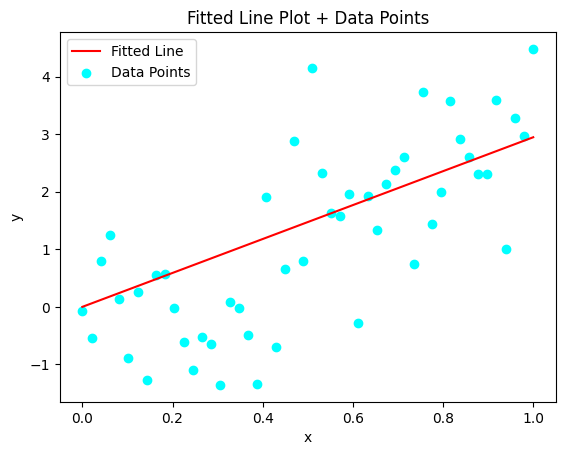

Optimal value: 47.347591353570905
Optimal solution: [2.94537805 0.         0.07080857 0.60304653 0.6767664  1.06497495
 0.10067093 1.1861934  0.09992824 1.68822364 0.07144113 0.0357323
 0.62297876 1.26715765 1.81628493 1.30760357 1.48294703 2.25708417
 0.87561241 1.03948421 1.57127877 2.48735087 0.71321979 1.95353079
 0.66085661 1.49778747 0.6501464  2.64374566 0.75496781 0.
 0.10715028 0.22363287 2.08006557 0.06307292 0.58901898 0.14310729
 0.33204305 0.50425043 1.41475892 1.51581379 0.83860261 0.35087449
 1.16262714 0.44865731 0.07285549 0.28480976 0.33795398 0.89008755
 1.75623915 0.46285316 0.09002211 1.53389344]
-------------------------------------- 

Optimal value with outliers:


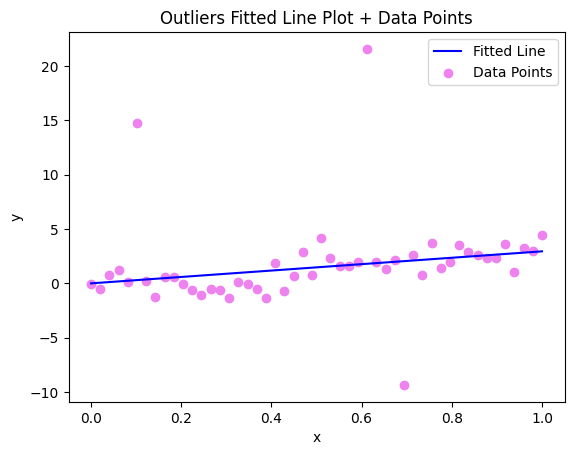

Optimal value: 89.38361320512554
Optimal solution: [ 2.94537805  0.          0.07080857  0.60304653  0.6767664   1.06497495
  0.10067093 14.47261221  0.09992824  1.68822364  0.07144113  0.0357323
  0.62297876  1.26715765  1.81628493  1.30760357  1.48294703  2.25708417
  0.87561241  1.03948421  1.57127877  2.48735087  0.71321979  1.95353079
  0.66085661  1.49778747  0.6501464   2.64374566  0.75496781  0.
  0.10715028  0.22363287 19.77118659  0.06307292  0.58901898  0.14310729
 11.39052507  0.50425043  1.41475892  1.51581379  0.83860261  0.35087449
  1.16262714  0.44865731  0.07285549  0.28480976  0.33795398  0.89008755
  1.75623915  0.46285316  0.09002211  1.53389344]
-------------------------------------- 



In [52]:
c = np.ones(N + 2)

for i in range(0, 2):
    if i == 0:
        b1 = b
    else:
        b1 = b_outliers
    # Define the inequality constraints matrix
    C_right = np.vstack([A, -A])
    C_left = np.vstack([-np.eye(N), -np.eye(N)])
    C = np.hstack([C_right, C_left])
    # print(C.shape)

    # Define the inequality constraints vector
    d = np.hstack([b1, -b1])
    # print(d.shape)

    # Solve the linear programming problem
    result = linprog(c, A_ub=C, b_ub=d, method='highs')

    if i == 0:
        print("Optimal value without outliers:")
        x_values = np.linspace(0, 1, N)
        y_values = result.x[0] * x_values + result.x[1]

        plt.plot(x_values, y_values, label='Fitted Line', color = 'red')
        plt.scatter(a, b1, label='Data Points', color = 'cyan')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Fitted Line Plot + Data Points')
        plt.show()
    else:
        print("Optimal value with outliers:")
        x_values = np.linspace(0, 1, N)
        y_values = result.x[0] * x_values + result.x[1]

        plt.plot(x_values, y_values, label='Fitted Line', color = 'blue')
        plt.scatter(a, b1, label='Data Points', color = 'violet')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Outliers Fitted Line Plot + Data Points')
        plt.show()

    print("Optimal value:", result.fun)
    print("Optimal solution:", result.x)
    print('-------------------------------------- \n')